<a href="https://colab.research.google.com/github/MilindiSenevirathne/DataMiningLabs/blob/main/DM_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('sample_data/MCI_2014_to_2019.csv')
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


In [44]:
print('Dataset length before drop null values')
len(df)

Dataset length before drop null values


206435

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    206435 non-null  float64
 1   Y                    206435 non-null  float64
 2   Index_               206435 non-null  int64  
 3   event_unique_id      206435 non-null  object 
 4   occurrencedate       206435 non-null  object 
 5   reporteddate         206435 non-null  object 
 6   premisetype          206435 non-null  object 
 7   ucr_code             206435 non-null  int64  
 8   ucr_ext              206435 non-null  int64  
 9   offence              206435 non-null  object 
 10  reportedyear         206435 non-null  int64  
 11  reportedmonth        206435 non-null  object 
 12  reportedday          206435 non-null  int64  
 13  reporteddayofyear    206435 non-null  int64  
 14  reporteddayofweek    206435 non-null  object 
 15  reportedhour     

In [46]:
df.isnull().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

In [47]:
df.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,ObjectId
count,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206376.000000,206376.000000,206376.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000
mean,-79.394940,43.707379,103218.000000,1696.667755,145.973953,2016.619323,15.746855,187.139933,12.838617,2016.579171,15.511024,186.506653,12.549868,72.230286,-79.394940,43.707379,103218.000000
std,0.104386,0.052718,59592.795747,323.481988,51.739660,1.717764,8.770511,103.601412,6.583508,1.764401,8.904154,103.884073,7.220263,40.758981,0.104386,0.052718,59592.795747
min,-79.639267,43.587093,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1.000000,-79.639267,43.587093,1.000000
25%,-79.471481,43.661152,51609.500000,1430.000000,100.000000,2015.000000,8.000000,100.000000,8.000000,2015.000000,8.000000,99.000000,7.000000,36.000000,-79.471481,43.661152,51609.500000
50%,-79.393333,43.701328,103218.000000,1450.000000,100.000000,2017.000000,16.000000,189.000000,14.000000,2017.000000,16.000000,188.000000,14.000000,76.000000,-79.393333,43.701328,103218.000000
75%,-79.319374,43.752068,154826.500000,2120.000000,200.000000,2018.000000,23.000000,277.000000,18.000000,2018.000000,23.000000,276.000000,19.000000,108.000000,-79.319374,43.752068,154826.500000
max,-79.123100,43.850788,206435.000000,2135.000000,230.000000,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,140.000000,-79.123100,43.850788,206435.000000


In [48]:
#Unique premise types that crimes are occurred
df['premisetype'].unique()

array(['Commercial', 'Apartment', 'Other', 'Outside', 'House'],
      dtype=object)

In [49]:
#Unique crime types
df['MCI'].unique()

array(['Assault', 'Break and Enter', 'Robbery', 'Theft Over',
       'Auto Theft'], dtype=object)

In [50]:
df.dropna(inplace=True)

df.isnull().sum()

X                      0
Y                      0
Index_                 0
event_unique_id        0
occurrencedate         0
reporteddate           0
premisetype            0
ucr_code               0
ucr_ext                0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofyear      0
reporteddayofweek      0
reportedhour           0
occurrenceyear         0
occurrencemonth        0
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    0
occurrencehour         0
MCI                    0
Division               0
Hood_ID                0
Neighbourhood          0
Long                   0
Lat                    0
ObjectId               0
dtype: int64

In [51]:
print('Dataset length after removing null values')
len(df)

Dataset length after removing null values


206376

In [52]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

Original Data Size after dropping Duplicates


(179765, 29)

In [53]:
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)

In [54]:
df_dropped.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Neighbourhood           object
Long                   float64
Lat                    float64
ObjectId                 int64
dtype: object

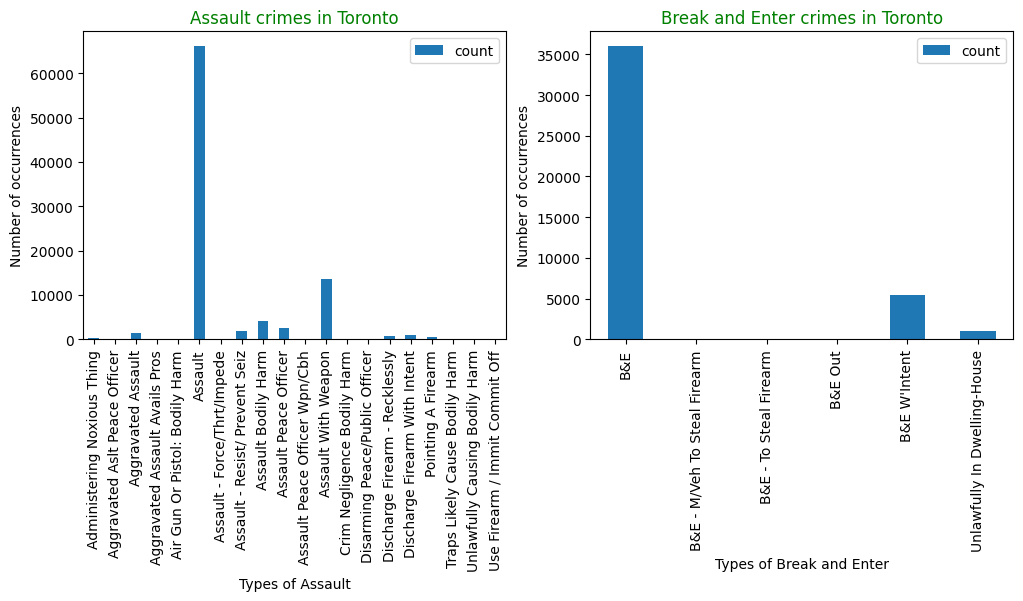

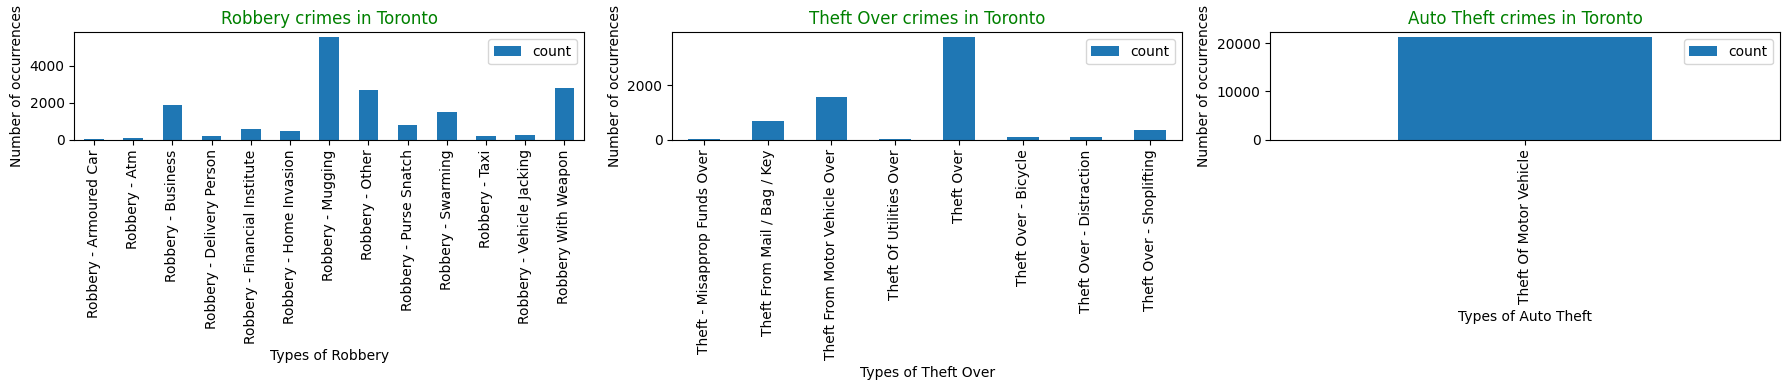

In [82]:
crime_types = ['Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft']
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 4))
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 4))
for i in range(2):
    crime_type = crime_types[i]
    crime_data = df[df['MCI'] == crime_type]
    crime_types_count = crime_data.groupby('offence').size().reset_index(name='count')
    crime_types_count = crime_types_count.sort_values(by='offence', ascending=True)
    ax = crime_types_count.plot.bar(x='offence', y='count', ax=axes1[i])
    ax.set_xlabel(f'Types of {crime_type}')
    ax.set_ylabel('Number of occurrences')
    ax.set_title(f'{crime_type} crimes in Toronto', color='green', fontsize=12)

for i in range(2, 5):
    crime_type = crime_types[i]
    crime_data = df[df['MCI'] == crime_type]
    crime_types_count = crime_data.groupby('offence').size().reset_index(name='count')
    crime_types_count = crime_types_count.sort_values(by='offence', ascending=True)
    ax = crime_types_count.plot.bar(x='offence', y='count', ax=axes2[i-2])
    ax.set_xlabel(f'Types of {crime_type}')
    ax.set_ylabel('Number of occurrences')
    ax.set_title(f'{crime_type} crimes in Toronto', color='green', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-89-2df456c0bb23>:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


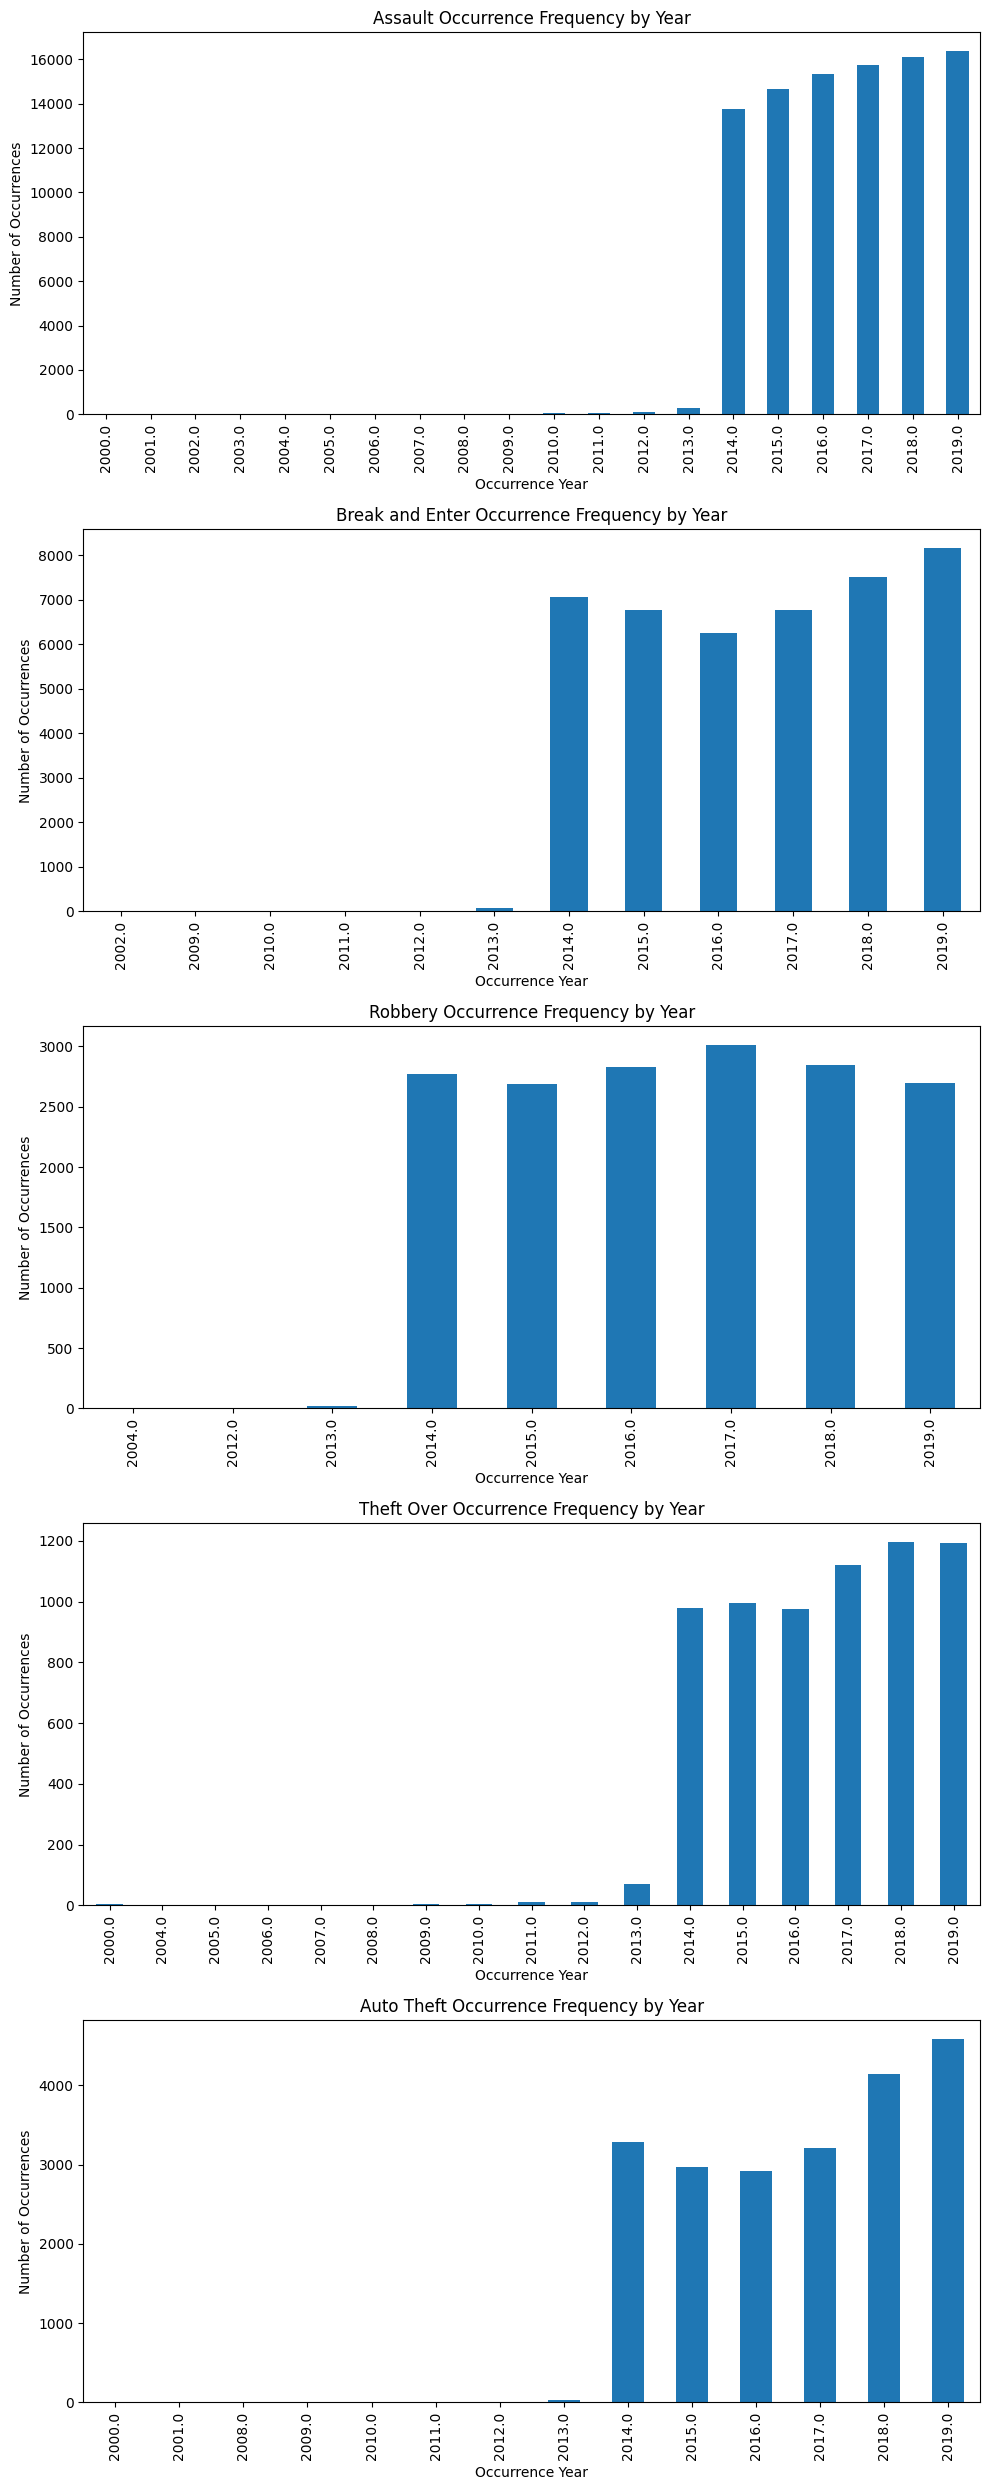

In [89]:
mci_types = df['MCI'].unique()
fig, axes = plt.subplots(len(mci_types), 1, figsize=(10, 5 * len(mci_types)), constrained_layout=True)

for i, mci_type in enumerate(mci_types):
    mci_data = df[df['MCI'] == mci_type]
    mci_occurrence_counts = mci_data.groupby('occurrenceyear').size()
    ax = axes[i]
    mci_occurrence_counts.plot(kind='bar', ax=ax, legend=False)
    ax.set_xlabel('Occurrence Year')
    ax.set_ylabel('Number of Occurrences')
    ax.set_title(f'{mci_type} Occurrence Frequency by Year')

plt.tight_layout()
plt.show()

In [91]:
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

In [92]:
df2.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,premisetype,occurenceday
0,0,0,18.0,0,0,0,0,0,0,0,0
1,0,1,15.0,1,1,1,0,1,1,0,1
2,0,1,16.0,2,2,2,1,2,2,1,2
3,0,2,26.0,3,3,3,1,2,3,2,3
4,0,0,18.0,0,0,4,0,3,4,0,0
